In [ ]:
#Need to usde certain dye for pink color blood smear image, we won't work with violet color image

import numpy as np
import cv2
import matplotlib.pyplot as plt
# from matplotlib.pyplot import imshow

from google.colab.patches import cv2_imshow

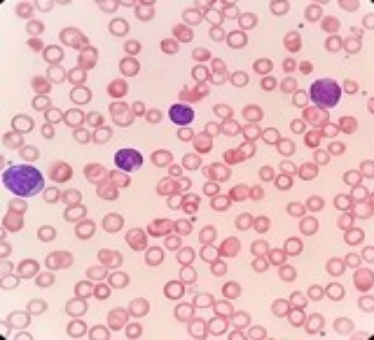

In [ ]:
image_cropped = cv2.imread("/content/sample5_cropped.jpg")
image_cropped = cv2.resize(image_cropped,(374,340))


image_cropped_1 = image_cropped.copy()

image_cropped_2 = image_cropped.copy()

cv2_imshow(image_cropped)

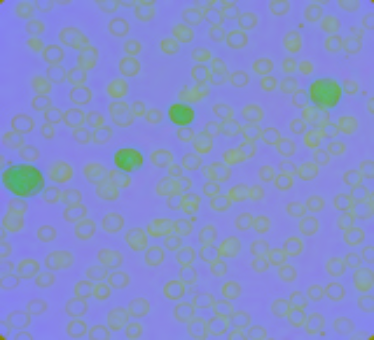

In [ ]:
lab = cv2.cvtColor(image_cropped, cv2.COLOR_BGR2LAB)
cv2_imshow(lab)

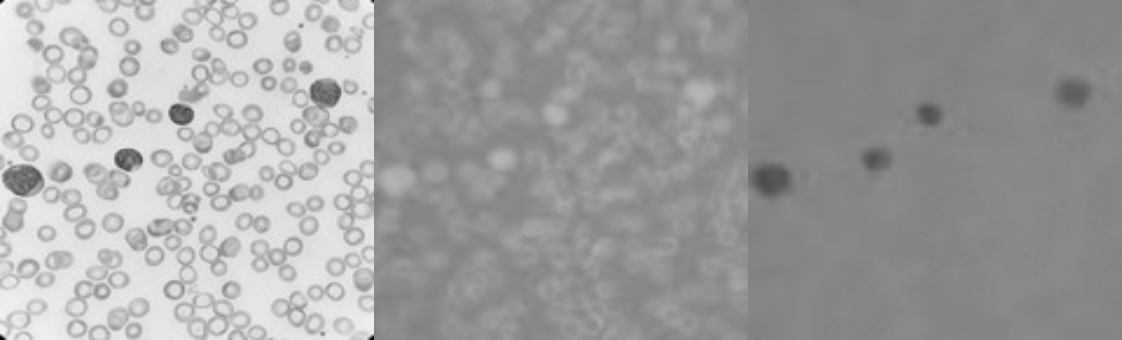

In [ ]:
l,a,b = cv2.split(lab)
lab_hstack = np.hstack((l,a,b))
cv2_imshow(lab_hstack)

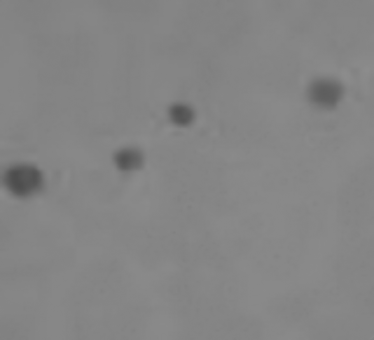

In [ ]:
cv2_imshow(b)

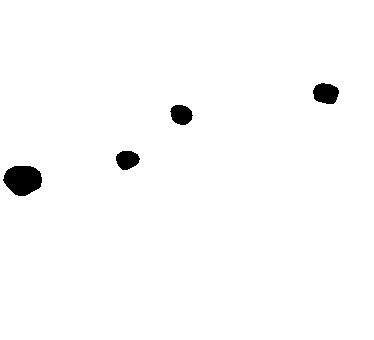

In [ ]:
th=0
max_val=255
ret,th = cv2.threshold(b,106,255,cv2.THRESH_BINARY)

cv2_imshow(th)

#threshhold = 100

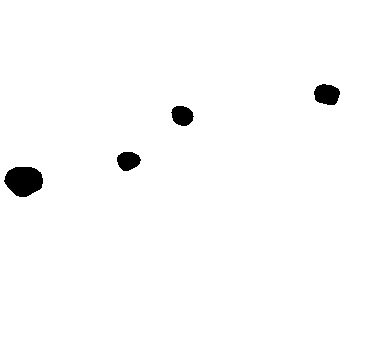

In [ ]:
k = np.ones((6,6),np.uint8)
# k = np.ones((2,2),np.uint8)
opening = cv2.morphologyEx(th, cv2.MORPH_OPEN, k)
cv2_imshow(opening)

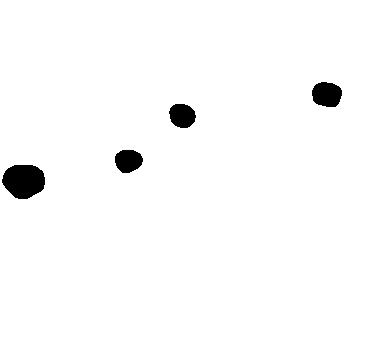

In [ ]:
k = np.array(
    [[0, 1, 1, 1, 0], 
     [1, 1, 1, 1, 1],
     [1, 1, 1, 1, 1],
     [1, 1, 1, 1, 1],
     [0, 1, 1, 1, 0]],np.uint8)

# k = np.ones((8,8),np.uint8)

erode = cv2.erode(opening,k)

erode = cv2.resize(erode,(374,340))
cv2_imshow(erode)

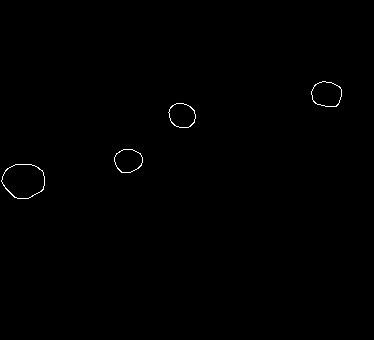

In [ ]:
edge = cv2.Canny(erode,100, 200)
cv2_imshow(edge)

In [ ]:
circles = cv2.HoughCircles(edge, cv2.HOUGH_GRADIENT,1,10,
                          param1=200, param2=12, minRadius=11, maxRadius=20)
# dt=10, param2=13, minRadius=13, maxRadius=20 was working on sample 2,4,5; but not on sample 3,1
# dt=10, param2=13, minRadius=12, maxRadius=20 was working on sample 2,3,4,5,6; but not on sample 1,7

# dt=10, param2=12, minRadius=11, maxRadius=20 was working on sample 1,3,4,5; but not on sample 2

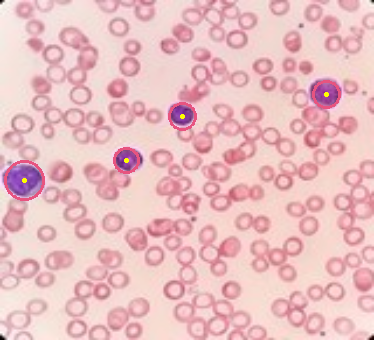

In [ ]:
if circles is not None:
  detected_circles = np.uint16(np.around(circles))

  
for (x, y ,r) in detected_circles[0, :]:
    cv2.circle(image_cropped_1, (x, y), r, (128,84,231), 2)
    cv2.circle(image_cropped_1, (x, y), 1, (0, 255, 255), 2)
cv2_imshow(image_cropped_1)



In [ ]:
wbc_num = detected_circles.shape[1]
print("Number of detected WBCs: ",wbc_num)

Number of detected WBCs:  4


In [ ]:
detected_circles

array([[[ 24, 180,  19],
        [182, 116,  13],
        [126, 160,  12],
        [326,  94,  13]]], dtype=uint16)